# Figure 2 - RNA-seq and ATAC-seq time series analyses and enrichment analyses

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/sreichl/projects/bmdm-stim/workflow/notebooks"

[1] "/home/sreichl/projects/bmdm-stim"

In [38]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

# configs

In [3]:
# configs
data_RNA <- file.path('results','RNA')
data_ATAC <- file.path('results','ATAC','all')

results_path <- file.path('results','figures','figure_2')

# time-series
timeseries_k <- read.csv(file=file.path('config','BMDM_timeseries_k.csv'), row.names=1, header=TRUE)

# enrichment analysis
timeseries_enrichment_terms <- read.csv(file=file.path('config','BMDM_timeseries_enrichment_terms.csv'), row.names=1, header=TRUE)

In [4]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# Load annotations

In [5]:
# load RNA annotations
RNA_annot <- read.csv(file=file.path('metadata','RNA_sample_metadata.csv'), row.names=1)
dim(RNA_annot)
head(RNA_annot)

[1] 66 10

,library,timepoint.after.thawing,cell_line,Treatment,Treatment_time,mouse_pool,sex,organism,bio.replicate,experiment_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
RNA_PT76_R1_C_albicans_2h,Quant-seq,d010,BMDM,C_albicans,2h,PT62_c,female,mouse,R1,PT76
RNA_PT82_R1_C_albicans_24h,Quant-seq,d010,BMDM,C_albicans,24h,PT62_c,female,mouse,R1,PT82
RNA_PT76_R1_C_albicans_4h,Quant-seq,d010,BMDM,C_albicans,4h,PT62_c,female,mouse,R1,PT76
RNA_PT76_R1_C_albicans_6h,Quant-seq,d010,BMDM,C_albicans,6h,PT62_c,female,mouse,R1,PT76
RNA_PT82_R1_C_albicans_8h,Quant-seq,d010,BMDM,C_albicans,8h,PT62_c,female,mouse,R1,PT82
RNA_PT76_R1_untreated_0h,Quant-seq,d010,BMDM,untreated,0h,PT62_c,female,mouse,R1,PT76


In [6]:
RNA_annot[RNA_annot$Treatment=='untreated','Treatment_time'] <- '0h'

In [7]:
# load ATAC annotations
ATAC_annot <- read.csv(file=file.path('metadata','ATAC_sample_metadata.csv'), row.names=1)
dim(ATAC_annot)
head(ATAC_annot)

[1] 78 10

,library,timepoint.after.thawing,cell_line,Treatment,Treatment_time,mouse_pool,sex,bio.replicate,organism,experiment_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
PT76_R1_C_albicans_2h,ATAC-seq,d010,BMDM,C_albicans,2h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_4h,ATAC-seq,d010,BMDM,C_albicans,4h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_6h,ATAC-seq,d010,BMDM,C_albicans,6h,PT62_c,female,R1,mouse,PT76
PT76_R1_C_albicans_8h,ATAC-seq,d010,BMDM,C_albicans,8h,PT62_c,female,R1,mouse,PT76
PT76_R1_untreated_0h,ATAC-seq,d010,BMDM,untreated,0h,PT62_c,female,R1,mouse,PT76
PT76_R1_IFN_beta_2h,ATAC-seq,d010,BMDM,IFN_beta,2h,PT62_c,female,R1,mouse,PT76


In [8]:
ATAC_annot[ATAC_annot$Treatment=='untreated','Treatment_time'] <- '0h'

In [9]:
# set treatment colors
# treatment_colors <- setNames(object = hue_pal()(length(unique(RNA_annot$Treatment))),nm = unique(RNA_annot$Treatment))
# treatment_colors <- treatment_colors[order(names(treatment_colors))]
# names(treatment_colors) <- str_replace(names(treatment_colors), '_', ' ')
# treatment_colors <- treatment_colors[c("untreated", names(treatment_colors)[names(treatment_colors) != "untreated"])]
treatment_colors

untreated C albicans   IFN beta  IFN gamma  LCMV Cl13       LO28        LPS 
 "#707070"  "#0072B2"  "#D55E00"  "#E69F00"  "#CC79A7"  "#009E73"  "#56B4E9"

# Time Series Analysis - cluster summary

## RNA

In [173]:
# load and summarize results for each treatment (treatment, cluster, numer of genes/regions)
clust_rna <- data.table()

for (treatment in unique(RNA_annot$Treatment)){
    if (treatment=='untreated'){
        next
    }
    
    ts_k <- timeseries_k[treatment, 'RNA']
    tmp_clust <- read.delim(file=file.path(data_RNA, "time_series", treatment, paste0('k_',ts_k), paste0('clustering_',treatment,'.csv')), sep=',', header = TRUE)#, row.names=1)

    tmp_sum <- data.table(table(tmp_clust[,4]))
    colnames(tmp_sum) <- c('cluster', 'n')
    tmp_sum$treatment <- treatment

    if (nrow(clust_rna)==0){
        clust_rna <- tmp_sum
    }else{
        clust_rna <- rbind(clust_rna, tmp_sum)
    }
}

dim(clust_rna)
head(clust_rna)

[1] 29  3

cluster,n,treatment
<chr>,<int>,<chr>
1,156,C_albicans
2,108,C_albicans
1,770,IFN_beta
2,139,IFN_beta
3,413,IFN_beta
4,1265,IFN_beta


In [174]:
# order by total number of genes/regions (left to right)
treatment_sum <- clust_rna[,sum(n),by=treatment][order(V1),]
treatments_ordered <- treatment_sum$treatment
clust_rna$treatment <- factor(clust_rna$treatment, levels=rev(treatments_ordered))

# get number of clusters
treatment_cluster_n <- data.frame(clust_rna[, max(as.numeric(cluster)),by=treatment])
rownames(treatment_cluster_n) <- treatment_cluster_n$treatment
treatment_cluster_n$treatment <- NULL
treatment_sum$clusters_n <- treatment_cluster_n[treatment_sum$treatment,'V1']

# sort legend
clust_rna$cluster <- factor(clust_rna$cluster, levels=sort(as.numeric(unique(clust_rna$cluster))))

In [175]:
width <- 2
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

In [176]:
# Reverse the order of clusters
clust_rna <- clust_rna[order(clust_rna$treatment, -clust_rna$cluster),]

# Calculate the cumulative sum of 'n' for each treatment
clust_rna$cum_n <- ave(clust_rna$n, clust_rna$treatment, FUN=cumsum)

# Calculate the middle y-coordinate for each cluster
clust_rna$middle_n <- clust_rna$cum_n - (clust_rna$n / 2)

# reformat treatments for correct coloring
clust_rna$treatment <- str_replace(clust_rna$treatment, '_', ' ')
treatment_sum$treatment <- str_replace(treatment_sum$treatment, '_', ' ')

# reorder by treatment
clust_rna$treatment <- factor(clust_rna$treatment, levels=unique(clust_rna$treatment))

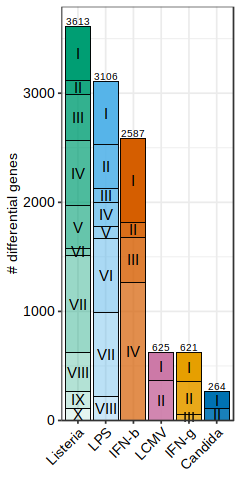

In [177]:
clust_rna_p <- ggplot() + 
    geom_bar(data=clust_rna, aes(fill=treatment, y=(n), x=treatment, alpha=cluster), position="stack", stat="identity", color="black", size=0.2)+
geom_text(data=treatment_sum, aes(x=treatment, y=V1, label=V1), vjust=-0.25, hjust=0.5, size=2)+
geom_text(data=clust_rna, aes(x=treatment, y=middle_n, label=cluster_format(cluster)), size=3, color="black")+
scale_fill_manual(values=treatment_colors) +
scale_alpha_manual(values=cluster_alphas) +
scale_x_discrete(label=treatment_format) + 
scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + # remove space below y=0
ylab("# differential genes") +
    macro_theme() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
      axis.title.x=element_blank()) + 
guides(alpha="none", fill="none")

clust_rna_p

In [178]:
# save plot
ggsave_new(filename="time_series_clusters_rna",
           results_path=results_path,
           plot=clust_rna_p,
           width=width,
           height=height
          )

## ATAC

In [179]:
# load and summarize results for each treatment (treatment, cluster, numer of genes/regions)
clust_atac <- data.table()

for (treatment in unique(RNA_annot$Treatment)){
    if (treatment=='untreated'){
        next
    }
    
    ts_k <- timeseries_k[treatment, 'ATAC']
    tmp_clust <- read.delim(file=file.path(data_ATAC, "time_series", treatment, paste0('k_',ts_k), paste0('clustering_',treatment,'.csv')), sep=',', header = TRUE)#, row.names=1)

    tmp_sum <- data.table(table(tmp_clust[,3]))
    colnames(tmp_sum) <- c('cluster', 'n')
    tmp_sum$treatment <- treatment

    if (nrow(clust_atac)==0){
        clust_atac <- tmp_sum
    }else{
        clust_atac <- rbind(clust_atac, tmp_sum)
    }
}

dim(clust_atac)
head(clust_atac)

[1] 38  3

cluster,n,treatment
<chr>,<int>,<chr>
1,341,C_albicans
2,650,C_albicans
3,259,C_albicans
4,250,C_albicans
5,475,C_albicans
1,328,IFN_beta


In [180]:
# order by total number of genes/regions (left to right)
treatment_sum <- clust_atac[,sum(n),by=treatment][order(V1),]
treatments_ordered <- treatment_sum$treatment
clust_atac$treatment <- factor(clust_atac$treatment, levels=rev(treatments_ordered))

# get number of clusters
treatment_cluster_n <- data.frame(clust_atac[, max(as.numeric(cluster)),by=treatment])
rownames(treatment_cluster_n) <- treatment_cluster_n$treatment
treatment_cluster_n$treatment <- NULL
treatment_sum$clusters_n <- treatment_cluster_n[treatment_sum$treatment,'V1']

# sort legend
clust_atac$cluster <- factor(clust_atac$cluster, levels=sort(as.numeric(unique(clust_atac$cluster))))

In [181]:
width <- 2
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

In [182]:
# Reverse the order of clusters
clust_atac <- clust_atac[order(clust_atac$treatment, -clust_atac$cluster),]

# Calculate the cumulative sum of 'n' for each treatment
clust_atac$cum_n <- ave(clust_atac$n, clust_atac$treatment, FUN=cumsum)

# Calculate the middle y-coordinate for each cluster
clust_atac$middle_n <- clust_atac$cum_n - (clust_atac$n / 2)

# reformat treatments for correct coloring
clust_atac$treatment <- str_replace(clust_atac$treatment, '_', ' ')
treatment_sum$treatment <- str_replace(treatment_sum$treatment, '_', ' ')

# reorder by treatment
clust_atac$treatment <- factor(clust_atac$treatment, levels=unique(clust_atac$treatment))

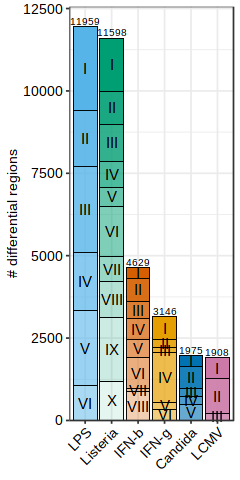

In [183]:
clust_atac_p <- ggplot() + 
    geom_bar(data=clust_atac, aes(fill=treatment, y=(n), x=treatment, alpha=cluster), position="stack", stat="identity", color="black", size=0.2)+
geom_text(data=treatment_sum, aes(x=treatment, y=V1, label=V1), vjust=-0.25, hjust=0.5, size=2)+
geom_text(data=clust_atac, aes(x=treatment, y=middle_n, label=cluster_format(cluster)), size=3, color="black")+
scale_fill_manual(values=treatment_colors) +
scale_alpha_manual(values=cluster_alphas) +
scale_x_discrete(label=treatment_format) +
scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + # remove space below y=0
ylab("# differential regions") +
    macro_theme() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
      axis.title.x=element_blank()) + 
guides(alpha="none", fill="none")

clust_atac_p

In [184]:
# save plot
ggsave_new(filename="time_series_clusters_atac",
           results_path=results_path,
           plot=clust_atac_p,
           width=width,
           height=height
          )

## plot together with patchwork

In [185]:
width <- 2
height <- 8
options(repr.plot.width=width, repr.plot.height=height)

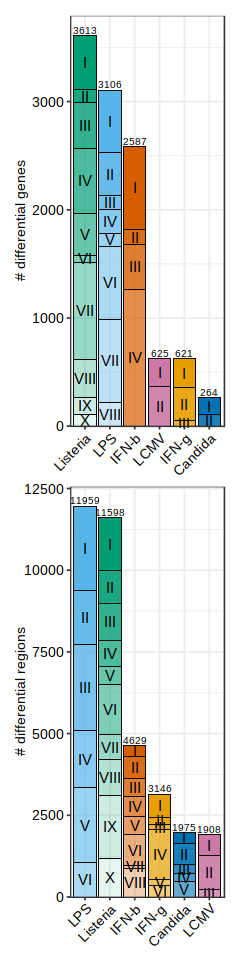

In [186]:
clust_p <- clust_rna_p / clust_atac_p
clust_p

In [187]:
# save plot
ggsave_new(filename="time_series_clusters_all",
           results_path=results_path,
           plot=clust_p,
           width=width,
           height=height
          )

# Time Series Analysis - temporal clusters per treatment

## RNA

In [377]:
# load & plot RNA time series clusters
RNA_ts_p <- list()

for (treatment in unique(RNA_annot$Treatment)){
    if (treatment=='untreated'){
        next
    }
    
    ts_k <- timeseries_k[treatment, 'RNA']
    
    tmp_centers <- read.delim(file=file.path(data_RNA, "time_series", treatment, paste0('k_',ts_k), paste0('clustercenters_',treatment,'.csv')), sep=',', header = TRUE)#, row.names=1)
    tmp_centers <- melt(t(tmp_centers))
    tmp_centers$Var1 <- paste0(lapply(tmp_centers$Var1, function(x) as.character(x)))
    colnames(tmp_centers) <- c('time','cluster','LFC')
    tmp_centers <- tmp_centers[tmp_centers$time!='X',]
    tmp_centers$time <- str_remove(tmp_centers$time,'X')
    tmp_centers$time <- str_remove(tmp_centers$time,'h')
    tmp_centers$time <- factor(tmp_centers$time, levels=c("0", "2", "4", "6","8", "24"))
                                      
    tmp_centers$cluster <- paste0(tmp_centers$cluster)

    treatment <- str_replace(treatment, '_', ' ')
    tmp_centers$treatment <- treatment

#     options(repr.plot.width=2, repr.plot.height=1.5)

    tmp_centers_p <- ggplot(tmp_centers, aes(x=time, y=LFC, group=cluster)) + #, alpha=cluster
    geom_line(aes(color=treatment), size=0.3)+
    facet_grid(. ~ treatment, labeller = treatment_format) +
    scale_x_discrete(expand = expansion(add = c(0,0.75))) +
    scale_color_manual(values=treatment_colors) +
    geom_text(data = tmp_centers[tmp_centers$time==24,], aes(label=cluster_format(cluster)), size = 2, hjust=0, nudge_x=0.1) + 
    macro_theme() +
    theme(
        axis.title.x=element_blank(), 
        axis.title.y=element_blank(), 
        plot.title = element_text(hjust = 0.5), # not necessary
        strip.background =element_rect(fill=treatment_colors[treatment]), 
        strip.text = element_text(colour = 'white', face = "bold"),
        panel.border = element_rect(colour = "black", fill=NA, size=0.5)
    )
    
    RNA_ts_p[[treatment]] <- tmp_centers_p+guides(shape = "none", color="none", alpha="none")
}

Warning message in melt(t(tmp_centers)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(tmp_centers)). In the next version, this warning will become an error.”
Warning message in melt(t(tmp_centers)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(tmp_centers)). In the next version, this warning will become an error.”
Warning message in melt(t(tmp_centers)):
“The melt generic in 

In [378]:
width <- 3
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

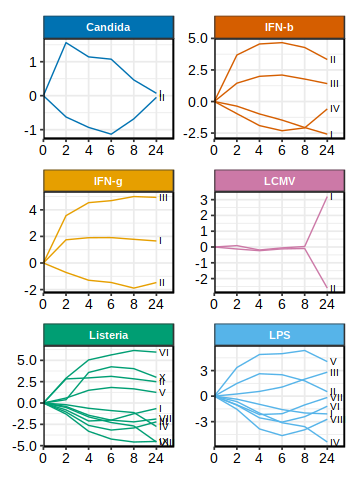

In [379]:
RNA_ts_p_all <- wrap_plots(RNA_ts_p, ncol = 2)
RNA_ts_p_all

In [380]:
# save plot
ggsave_new(filename="time_series_rna",
           results_path=results_path,
           plot=RNA_ts_p_all,
           width=width,
           height=height
          )

## ATAC

In [381]:
# load & plot ATAC time series clusters
ATAC_ts_p <- list()

for (treatment in unique(ATAC_annot$Treatment)){
    if (treatment=='untreated'){
        next
    }
    
    ts_k <- timeseries_k[treatment, 'ATAC']
    
    tmp_centers <- read.delim(file=file.path(data_ATAC, "time_series", treatment, paste0('k_',ts_k), paste0('clustercenters_',treatment,'.csv')), sep=',', header = TRUE)#, row.names=1)
    tmp_centers <- melt(t(tmp_centers))
    tmp_centers$Var1 <- paste0(lapply(tmp_centers$Var1, function(x) as.character(x)))
    colnames(tmp_centers) <- c('time','cluster','LFC')
    tmp_centers <- tmp_centers[tmp_centers$time!='X',]
    tmp_centers$time <- str_remove(tmp_centers$time,'X')
    tmp_centers$time <- str_remove(tmp_centers$time,'h')
    tmp_centers$time <- factor(tmp_centers$time, levels=c("0", "2", "4", "6","8", "24"))
                                      
    tmp_centers$cluster <- paste0(tmp_centers$cluster)

    treatment <- str_replace(treatment, '_', ' ')
    tmp_centers$treatment <- treatment

#     options(repr.plot.width=2, repr.plot.height=1.5)

    tmp_centers_p <- ggplot(tmp_centers, aes(x=time, y=LFC, group=cluster)) +
    geom_line(aes(color=treatment), size=0.3)+
    facet_grid(. ~ treatment, labeller = treatment_format) +
    scale_x_discrete(expand = expansion(add = c(0,0.75))) +
    scale_color_manual(values=treatment_colors) +
    geom_text(data = tmp_centers[tmp_centers$time==24,], aes(label=cluster_format(cluster)), size = 2, hjust=0, nudge_x=0.1) + # Add labels outside the plot
     macro_theme() +
    theme(
        axis.title.x=element_blank(), 
        axis.title.y=element_blank(), 
        plot.title = element_text(hjust = 0.5), # not necessary
        strip.background =element_rect(fill=treatment_colors[treatment]), 
        strip.text = element_text(colour = 'white', face="bold"),
        panel.border = element_rect(colour = "black", fill=NA, size=0.5)
    )
    
    ATAC_ts_p[[treatment]] <- tmp_centers_p+guides(shape = "none", color="none")
}

Warning message in melt(t(tmp_centers)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(tmp_centers)). In the next version, this warning will become an error.”
Warning message in melt(t(tmp_centers)):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(tmp_centers)). In the next version, this warning will become an error.”
Warning message in melt(t(tmp_centers)):
“The melt generic in 

In [382]:
width <- 3
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

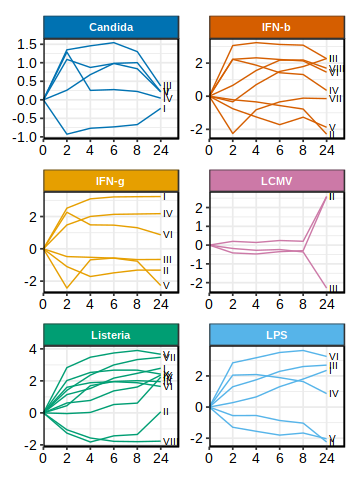

In [383]:
ATAC_ts_p_all <- wrap_plots(ATAC_ts_p, ncol = 2)
ATAC_ts_p_all

In [384]:
# save plot
ggsave_new(filename="time_series_atac",
           results_path=results_path,
           plot=ATAC_ts_p_all,
           width=width,
           height=height
          )

## all

In [385]:
width <- 3
height <- 8
options(repr.plot.width=width, repr.plot.height=height)

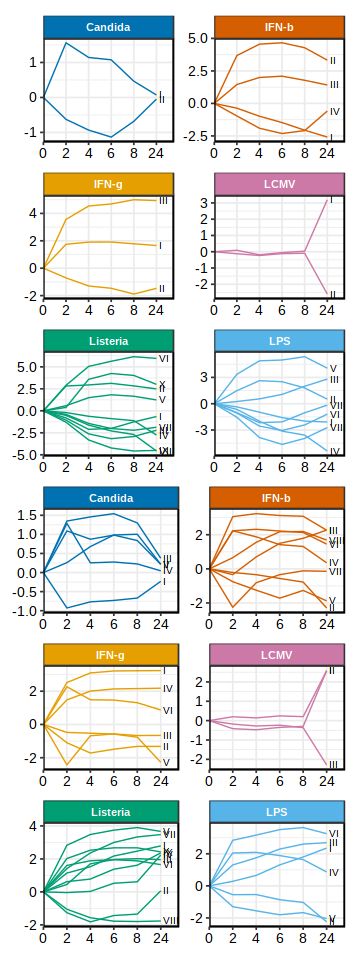

In [386]:
time_series_p <- RNA_ts_p_all / ATAC_ts_p_all
time_series_p

In [387]:
# save plot
ggsave_new(filename="time_series_all",
           results_path=results_path,
           plot=time_series_p,
           width=width,
           height=height
          )

# Time Series Analysis - Enrichment across ALL temporal clusters

## RNA

In [388]:
# for selection
dbs <- c("ENCODE_TF_ChIP-seq_2015",
             "ChEA_2016",
             "BioPlanet_2019", 
             "KEGG_2019_Mouse", 
             "WikiPathways_2019_Mouse",
             "GO_Biological_Process_2021")
top_ns <- c(1,2)
modes <- c('pval','or')

# selection
dbs <- c("BioPlanet_2019")
top_ns <- c(2)
modes <- c('pval')

In [397]:
for (db in dbs){
    for (mode in modes){
        for (top_n in top_ns){
            
            terms_RNA <- c()

            # determine enrichment terms of interest based on stat. sign.
            if (mode=='pval'){
                for (treatment in unique(RNA_annot$Treatment)){
                    if (treatment=='untreated'){
                        next
                    }

                    k_RNA <- timeseries_k[treatment, 'RNA']

                    # load adjusted p-values & select most significant terms for each cluster
                    tmp_adjpvalues <- read.delim(file=file.path(data_RNA, 
                                                                 "enrichment_analysis", 
                                                                 "time_series", 
                                                                 treatment, 
                                                                 paste0('k_', k_RNA), 
                                                                 paste0('summary_',db,'_adjpvalues.csv')
                                                                ), 
                                                  sep=',', header = TRUE, row.names=1)

                    # remove all columns with not one single significant hit
                    tmp_adjpvalues <- tmp_adjpvalues[,colSums(is.na(tmp_adjpvalues))<nrow(tmp_adjpvalues)]

                    # identify most significant term per group
                    #tmp_terms <- unique(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(x, index.return = TRUE)$ix][1:top_n]))
                    tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[order(x)][1:top_n])))

                    terms_RNA <- c(terms_RNA, tmp_terms)
                }
            }
            if (mode=='or'){
                # determine enrichment terms of interest based on OR (effect size)
                for (treatment in unique(RNA_annot$Treatment)){
                    if (treatment=='untreated'){
                        next
                    }

                    k_RNA <- timeseries_k[treatment, 'RNA']

                    # load adjusted p-values & select most significant terms for each cluster
                    tmp_adjpvalues <- read.delim(file=file.path(data_RNA, 
                                                                 "enrichment_analysis", 
                                                                 "time_series", 
                                                                 treatment, 
                                                                 paste0('k_', k_RNA), 
                                                                 paste0('summary_',db,'_oddsratio.csv')
                                                                ), 
                                                  sep=',', header = TRUE, row.names=1)

                    # remove all columns with not one single significant hit
                    tmp_adjpvalues <- tmp_adjpvalues[,colSums(is.na(tmp_adjpvalues))<nrow(tmp_adjpvalues)]

                    # identify most significant term per group
                    #tmp_terms <- unique(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(-x, index.return = TRUE)$ix][1:top_n]))
                    tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[order(-x)][1:top_n])))

                    terms_RNA <- c(terms_RNA, tmp_terms)
                }
            }

            terms_RNA <- unique(terms_RNA)
            length(terms_RNA)

            # go through enrichment results of every cluster (not summary) and load the respective statistics (odds ratio & adj p value)
            plot_enrichments <- data.frame()

            for (treatment in unique(RNA_annot$Treatment)){
                if (treatment=='untreated'){
                    next
                }

                k_RNA <- timeseries_k[treatment, 'RNA']

                for (k in 1:k_RNA){
            #         print(paste(treatment,k))

                    # load odds ratios of enrichment results
                    tmp_enrichments <- read.delim(file=file.path(data_RNA, 
                                                                 "enrichment_analysis", 
                                                                 "time_series", 
                                                                 treatment, 
                                                                 paste0('k_', k_RNA),
                                                                 paste0('cluster_',k),
                                                                 db,
                                                                 paste0('Enrichr_',db,'_cluster_',k,'.csv')
                                                                ), 
                                                  sep=',', header = TRUE, row.names=3)

                        # filter by selected enrichment terms
                    tmp_terms <- intersect(terms_RNA, rownames(tmp_enrichments))
                    plot_enrichments[tmp_terms, paste0(treatment,'_cluster_',k)] <- tmp_enrichments[tmp_terms, 'Odds.Ratio']
                }
            }
            # head(plot_enrichments)
            dim(plot_enrichments)
            write.csv(plot_enrichments, file=file.path(results_path, paste0("time_series_enrichment_RNA_",db,"_",mode,"_topn",top_n,".csv")), row.names = TRUE)

            # preparations for plotting
            plot_enrichments_numbers <- data.frame(plot_enrichments)
            # data transformations
            plot_enrichments[is.na(plot_enrichments)] <- 1
            plot_enrichments <- log2(plot_enrichments)

            # transform terms
            rownames(plot_enrichments) <- remove_term_suffix(db=db, terms=rownames(plot_enrichments))

            # heatmap annotation & color configs
            annotation_col <- data.frame(row.names=(colnames(plot_enrichments)))
            annotation_col$Cluster <- paste0(lapply(rownames(annotation_col), function(x) tail(str_split(x, '_cluster_')[[1]], n=1)[1]))
            annotation_col$Treatment <- str_replace(paste0(lapply(rownames(annotation_col), function(x) head(str_split(x, '_cluster_')[[1]], n=1)[1])), '_', ' ')

            # head(annotation_col)

            ann_colors = list(
                Treatment = treatment_colors[names(treatment_colors)!='untreated'],
                Cluster = cluster_colors
            )

            width <- 8
            height <- 8
            options(repr.plot.width=width, repr.plot.height=height)
            
            # format treatment and cluster labels
            colnames(plot_enrichments) <- unlist(lapply(colnames(plot_enrichments), cluster_format))
            rownames(annotation_col) <- unlist(lapply(rownames(annotation_col), cluster_format))
            annotation_col$Treatment <- unlist(lapply((annotation_col$Treatment), treatment_format))
            annotation_col$Cluster <- unlist(lapply((annotation_col$Cluster), cluster_format))
            names(ann_colors$Treatment) <- unlist(lapply(names(ann_colors$Treatment), treatment_format))
            names(ann_colors$Cluster) <- unlist(lapply(names(ann_colors$Cluster), cluster_format))

            enr_rna_clustermap <- as.ggplot(pheatmap(t(plot_enrichments), 
                           show_rownames=T, 
                           show_colnames=T, 
                           legend = T,
                           cutree_rows = 6, # split clusters
                           cutree_cols = 3, # split clusters
                           treeheight_row = 3,
                           treeheight_col = 3,
                           annotation_row = annotation_col[,c('Treatment'), drop=FALSE],#annotation_col[,c('Cluster','Treatment')], # annotate treatments &  clusters
                           annotation_colors = ann_colors["Treatment"], #ann_colors, # add color to labels
                           annotation_legend = TRUE,
                           breaks=seq(-max(abs(plot_enrichments)), max(abs(plot_enrichments)), length.out=200), # make log2(OR=1)=0 the middle of color scale
                           color=colorRampPalette(c( "#2c7bb6", "#f7f7f7", "#d7191c"))(200),
                           annotation_names_row = FALSE,
                           #angle_col = "45",
#                          cellheight=8,
                           border_color=NA,
                           fontsize = 6,
#                          display_numbers=as.matrix(plot_enrichments_numbers),
#                                                      na_col='green',
#                                                      number_color='black',
                             height=height,
                             widht=width,
                            silent=TRUE
                          ))

            # save plot
            ggsave_new(filename=paste0("time_series_enrichment_RNA_",db,"_",mode,"_topn",top_n),
                       results_path=results_path,
                       plot=enr_rna_clustermap,
                       width=width,
                       height=height
                      )
                                                                  
            # make version for complete figure 
                                                                  
            width <- 4
            height <- 4
                                                                  
            enr_rna_clustermap <- as.ggplot(pheatmap(t(plot_enrichments), 
                           show_rownames=T, 
                           show_colnames=F, 
                           legend = F,
                           cutree_rows = 6, # split clusters
                           cutree_cols = 3, # split clusters
                           treeheight_row = 3,
                           treeheight_col = 3,
                           annotation_row = annotation_col[,c('Treatment'), drop=FALSE], # annotate treatments &  clusters
                           annotation_colors = ann_colors["Treatment"], # add color to labels
                           annotation_legend = FALSE,
                           breaks=seq(-max(abs(plot_enrichments)), max(abs(plot_enrichments)), length.out=200), # make log2(OR=1)=0 the middle of color scale
                           color=colorRampPalette(c( "#2c7bb6", "#f7f7f7", "#d7191c"))(200),
                           annotation_names_row = FALSE,
                           angle_col = "45",
#                          cellheight=8,
                           border_color=NA,
                           fontsize = 6,
#                          display_numbers=as.matrix(plot_enrichments_numbers),
#                                                      na_col='green',
#                                                      number_color='black',
                             height=height,
                             widht=width,
                            silent=TRUE
                          ))
                                                                  
            print(paste(db, mode, top_n, nrow(plot_enrichments)))
        }
    }
}

[1] "BioPlanet_2019 pval 2 35"


## ATAC

In [398]:
# for selection
GREAT_databases <- c("GO Biological Process")
GSEApy_databases <- c("ENCODE_TF_ChIP-seq_2015",
             "ChEA_2016",
             "BioPlanet_2019", 
             "KEGG_2019_Mouse", 
             "WikiPathways_2019_Mouse",
             "GO_Biological_Process_2021")
dbs <- c(GSEApy_databases, GREAT_databases)
top_ns <- c(1,2)
modes <- c('pval','or')

# selection
dbs <- c("GO Biological Process")
top_ns <- c(2)
modes <- c('pval')

In [399]:
for (db in dbs){
    for (mode in modes){
        for (top_n in top_ns){
            
            terms_ATAC <- c()

            # determine enrichment terms of interest based on stat. sign.
            if (mode=='pval'){
                for (treatment in unique(RNA_annot$Treatment)){
                    if (treatment=='untreated'){
                        next
                    }

                    k_ATAC <- timeseries_k[treatment, 'ATAC']

                    # load adjusted p-values & select most significant terms for each cluster
                    tmp_adjpvalues <- read.delim(file=file.path(data_ATAC, 
                                                                 "enrichment_analysis", 
                                                                 "time_series",
                                                                 paste0(treatment,'_k', k_ATAC,'_'), 
                                                                "0_summaries",
                                                                 paste0('summary_',db,'_adjpvalues.csv')
                                                                ), 
                                                  sep=',', header = TRUE, row.names=1)

                    
                    
                    # remove all columns with not one single significant hit
                    tmp_adjpvalues <- tmp_adjpvalues[,colSums(is.na(tmp_adjpvalues))<nrow(tmp_adjpvalues)]

                    # identify most significant term per group
                    #tmp_terms <- unique(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(x, index.return = TRUE)$ix][1:top_n]))
                    tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[order(x)][1:top_n])))

                    terms_ATAC <- c(terms_ATAC, tmp_terms)
                }
            }
            if (mode=='or'){
                # determine enrichment terms of interest based on OR (effect size)
                for (treatment in unique(RNA_annot$Treatment)){
                    if (treatment=='untreated'){
                        next
                    }

                    k_ATAC <- timeseries_k[treatment, 'ATAC']

                    # load adjusted p-values & select most significant terms for each cluster
                    tmp_adjpvalues <- read.delim(file=file.path(data_ATAC, 
                                                                 "enrichment_analysis", 
                                                                 "time_series", 
                                                                 paste0(treatment,'_k', k_ATAC,'_'), 
                                                                "0_summaries",
                                                                 paste0('summary_',db,'_oddsratio.csv')
                                                                ), 
                                                  sep=',', header = TRUE, row.names=1)

                    # remove all columns with not one single significant hit
                    tmp_adjpvalues <- tmp_adjpvalues[,colSums(is.na(tmp_adjpvalues))<nrow(tmp_adjpvalues)]

                    # identify most significant term per group
                    #tmp_terms <- unique(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[sort(-x, index.return = TRUE)$ix][1:top_n]))
                    tmp_terms <- unique(as.vector(sapply(tmp_adjpvalues, function(x) rownames(tmp_adjpvalues)[order(-x)][1:top_n])))

                    terms_ATAC <- c(terms_ATAC, tmp_terms)
                }
            }

            terms_ATAC <- unique(terms_ATAC)
            length(terms_ATAC)

            # go through enrichment results of every cluster (not summary) and load the respective statistics (odds ratio & adj p value)
            plot_enrichments <- data.frame()

            for (treatment in unique(RNA_annot$Treatment)){
                if (treatment=='untreated'){
                    next
                }

                k_ATAC <- timeseries_k[treatment, 'ATAC']

                for (k in 1:k_ATAC){
            #         print(paste(treatment,k))
                    
                    # load odds ratios of enrichment results depending on database
                    
                    if (db %in% GSEApy_databases){
                        tmp_enrichments <- read.delim(file=file.path(data_ATAC, 
                                                                     "enrichment_analysis", 
                                                                     "time_series",
                                                                     paste0(treatment,'_k', k_ATAC,'_cluster_',k), 
                                                                     'GSEApy',
                                                                     db,
                                                                     paste0('Enrichr_',db,'.csv')
                                                                    ), 
                                                      sep=',', header = TRUE, row.names=3)

                        # filter by selected enrichment terms
                        tmp_terms <- intersect(terms_ATAC, rownames(tmp_enrichments))
                        plot_enrichments[tmp_terms, paste0(treatment,'_cluster_',k)] <- tmp_enrichments[tmp_terms, 'Odds.Ratio']
                    }
                    
                    if (db %in% GREAT_databases){
                        tmp_enrichments <- read.delim(file=file.path(data_ATAC, 
                                                                     "enrichment_analysis", 
                                                                     "time_series",
                                                                     paste0(treatment,'_k', k_ATAC,'_cluster_',k), 
                                                                     'GREAT',
                                                                     paste0('GREAT_',db,'.tsv')
                                                                    ), 
                                                      sep='\t', header = TRUE, row.names=2)

                        # filter by selected enrichment terms
                        rownames(tmp_enrichments) <- paste0(rownames(tmp_enrichments),tmp_enrichments$ID)
                        tmp_terms <- intersect(terms_ATAC, rownames(tmp_enrichments))
                        plot_enrichments[tmp_terms, paste0(treatment,'_cluster_',k)] <- tmp_enrichments[tmp_terms, 'Hyper_Fold_Enrichment']
                    }

                    
                }
            }
            # head(plot_enrichments)
            dim(plot_enrichments)
            write.csv(plot_enrichments, file=file.path(results_path, paste0("time_series_enrichment_ATAC_",db,"_",mode,"_topn",top_n,".csv")), row.names = TRUE)

            # preparations for plotting
            plot_enrichments_numbers <- data.frame(plot_enrichments)
            # data transformations
            plot_enrichments[is.na(plot_enrichments)] <- 1
            plot_enrichments <- log2(plot_enrichments)
            # manage inf values
            plot_enrichments[is.infinite(as.matrix(plot_enrichments)) & as.matrix(plot_enrichments)<0] <- min(plot_enrichments[is.finite(as.matrix(plot_enrichments))])
            plot_enrichments[is.infinite(as.matrix(plot_enrichments)) & as.matrix(plot_enrichments)>0] <- max(plot_enrichments[is.finite(as.matrix(plot_enrichments))])

            # transform terms
            rownames(plot_enrichments) <- remove_term_suffix(db=db, terms=rownames(plot_enrichments))

            # heatmap annotation & color configs
            annotation_col <- data.frame(row.names=(colnames(plot_enrichments)))
            annotation_col$Cluster <- paste0(lapply(rownames(annotation_col), function(x) tail(str_split(x, '_cluster_')[[1]], n=1)[1]))
            annotation_col$Treatment <- str_replace(paste0(lapply(rownames(annotation_col), function(x) head(str_split(x, '_cluster_')[[1]], n=1)[1])), '_', ' ')

            # head(annotation_col)

            ann_colors = list(
                Treatment = treatment_colors[names(treatment_colors)!='untreated'],
                Cluster = cluster_colors
            )

            width <- 8
            height <- 8
                                                                  
            # format treatment and cluster labels
            colnames(plot_enrichments) <- unlist(lapply(colnames(plot_enrichments), cluster_format))
            rownames(annotation_col) <- unlist(lapply(rownames(annotation_col), cluster_format))
            annotation_col$Treatment <- unlist(lapply((annotation_col$Treatment), treatment_format))
            annotation_col$Cluster <- unlist(lapply((annotation_col$Cluster), cluster_format))
            names(ann_colors$Treatment) <- unlist(lapply(names(ann_colors$Treatment), treatment_format))
            names(ann_colors$Cluster) <- unlist(lapply(names(ann_colors$Cluster), cluster_format))

            # version to be saved separately
            enr_atac_clustermap <- as.ggplot(pheatmap(t(plot_enrichments), 
                           show_rownames=T, 
                           show_colnames=T,
                           legend = T,
                           cutree_rows = 5, # split clusters
                           cutree_cols = 4, # split clusters
                           treeheight_row = 3,
                           treeheight_col = 3,
                           annotation_row = annotation_col[,c('Treatment'), drop=FALSE], # annotate treatments &  clusters
                           annotation_colors = ann_colors["Treatment"], # add color to labels
                           annotation_legend = TRUE,
                           breaks=seq(-max(abs(plot_enrichments)), max(abs(plot_enrichments)), length.out=200), # make log2(OR=1)=0 the middle of color scale
                           color=colorRampPalette(c( "#2c7bb6", "#f7f7f7", "#d7191c"))(200),
                           annotation_names_row = T,
                           border_color=NA,
                           fontsize = 6,
                                                      #angle_col = "45",
#                              display_numbers=as.matrix(plot_enrichments_numbers),
#                                                      na_col='green',
#                                                      number_color='black',
                             height=height,
                             widht=width,
                            silent=TRUE
                          ))

            # save plot
            ggsave_new(filename=paste0("time_series_enrichment_ATAC_",db,"_",mode,"_topn",top_n),
                       results_path=results_path,
                       plot=enr_atac_clustermap,
                       width=width,
                       height=height
                      )
            
                                                                  
            # make version for complete figure 
                                                                  
            width <- 4
            height <- 4
            
            enr_atac_clustermap <- as.ggplot(pheatmap(t(plot_enrichments), 
                           show_rownames=T, 
                           show_colnames=F,
                           legend = F,
                           cutree_rows = 5, # split clusters
                           cutree_cols = 4, # split clusters
                           treeheight_row = 3,
                           treeheight_col = 3,
                           annotation_row = annotation_col[,c('Treatment'), drop=FALSE], # annotate treatments &  clusters
                           annotation_colors = ann_colors["Treatment"], # add color to labels
                           annotation_legend = FALSE,
                           breaks=seq(-max(abs(plot_enrichments)), max(abs(plot_enrichments)), length.out=200), # make log2(OR=1)=0 the middle of color scale
                           color=colorRampPalette(c( "#2c7bb6", "#f7f7f7", "#d7191c"))(200),
                        annotation_names_row = F,
                         border_color=NA,
                             fontsize = 6,
                                                      angle_col = "45",
#                              display_numbers=as.matrix(plot_enrichments_numbers),
#                                                      na_col='green',
#                                                      number_color='black',
                             height=height,
                             widht=width,
                            silent=TRUE
                          ))
            print(paste(db, mode, top_n, nrow(plot_enrichments)))
        }
    }
}

[1] "GO Biological Process pval 2 35"


## all

In [400]:
width <- 4
height <- 8
options(repr.plot.width=width, repr.plot.height=height)

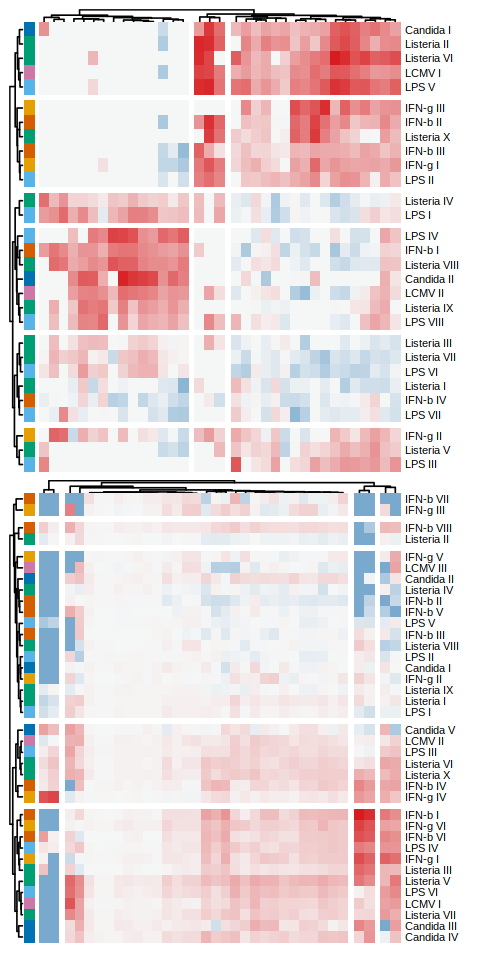

In [401]:
# RNA next to ATAC
enr_clustermap_all <- enr_rna_clustermap / enr_atac_clustermap
enr_clustermap_all

In [402]:
# save plot
ggsave_new(filename="time_series_enrichment_all",
           results_path=results_path,
           plot=enr_clustermap_all,
           width=width,
           height=height
          )

# Time Series of selected clusters across treatments

## RNA

In [408]:
# config
# rna_treatment_cl1 <- data.frame(treatment=c('C_albicans', 'IFN_beta', 'LO28', 'LPS'), cluster=c(2, 1, 8, 4))
# rna_treatment_cl1 <- data.frame(treatment=c('C_albicans', 'LO28', 'LO28', 'LCMV_Cl13', 'LPS'), cluster=c(1, 2, 6, 1, 5))
rna_treatment_cl2 <- data.frame(treatment=c('IFN_gamma', 'IFN_beta', 'LO28','IFN_beta','IFN_gamma', 'LPS'), cluster=c(3, 2, 10, 3, 1, 2))
# rna_treatment_cl3 <- data.frame(treatment=c('LO28','LPS'), cluster=c(4,1))
rna_treatment_cl4 <- data.frame(treatment=c('LPS', 'IFN_beta', 'LO28', 'C_albicans', 'LCMV_Cl13', 'LO28', 'LPS'), cluster=c(4,1,8,2,2,9,8))


width <- 3
height <- 2
options(repr.plot.width=width, repr.plot.height=height)

In [409]:
special_centers_rna_p <- list()

j <- 1

for (tmp_rna in list(rna_treatment_cl2, rna_treatment_cl4)){ # rna_treatment_cl3 rna_treatment_cl1

    rna_special_ts <- data.frame()

    for (i in 1:nrow(tmp_rna)){
        tmp_treat <- tmp_rna[i,'treatment']
        tmp_cl <- tmp_rna[i,'cluster']
        ts_k <- timeseries_k[tmp_treat, 'RNA']
        tmp_centers <- read.delim(file=file.path(data_RNA, "time_series", tmp_treat, paste0('k_',ts_k), paste0('clustercenters_',tmp_treat,'.csv')), sep=',', header = TRUE)#, row.names=1)
        tmp_cluster <- tmp_centers[tmp_cl,2:ncol(tmp_centers)]

        tmp_cluster <- melt(tmp_cluster, value.name = 'LFC', variable.name = 'time')
        tmp_cluster$treatment <- tmp_treat
        tmp_cluster$cluster <- tmp_cl

        if (nrow(rna_special_ts)==0){
            rna_special_ts <- tmp_cluster
        }
        else{
            rna_special_ts <- rbind(rna_special_ts, tmp_cluster)
        }
    }

    rna_special_ts$time <- str_remove(rna_special_ts$time,'X')
    rna_special_ts$time <- str_remove(rna_special_ts$time,'h')
    rna_special_ts$time <- factor(rna_special_ts$time, levels=c("0", "2", "4", "6","8", "24"))
    rna_special_ts$treatment <- str_replace(rna_special_ts$treatment, '_', ' ')
    rna_special_ts$group <- paste(rna_special_ts$treatment,rna_special_ts$cluster)
    rna_special_ts$cluster <- paste0(rna_special_ts$cluster)
    rna_special_ts$label <- paste0(treatment_format(rna_special_ts$treatment), ' ', cluster_format(rna_special_ts$cluster))

    # rna_special_ts

    tmp_special_centers_p <- ggplot(rna_special_ts, aes(x=time, y=LFC, group=group)) +
        geom_line(aes(color=treatment), size=0.5)+
        scale_x_discrete(expand = expansion(add = c(0,0)))+
        scale_y_continuous(limits = c(-ceil(max(abs(rna_special_ts$LFC))),ceil(max(abs(rna_special_ts$LFC))))) +
        scale_color_manual(values=treatment_colors, guide="none") +
        geom_label_repel(data = subset(rna_special_ts, time==24), 
                         aes(label = label, fill=treatment, segment.square  = TRUE, segment.inflect = TRUE),
                         color="white",
                         segment.color="black",
                         size = 2,
    #                      hjust = "center",
    #                      nudge_x = 0.1, 
    #                      na.rm = TRUE, 
                         xlim = c(6.5, Inf), 
    #                      ylim = c(NA, NA), 
                             force             = 0.5,
                            nudge_x           = 0.15,
                            direction         = "y",
                            hjust             = 0,
                            segment.size      = 0.5,
                            segment.curvature = -0.1,
                         seed=42
                        )+
    
    scale_fill_manual(values = treatment_colors, guide="none") +
        macro_theme()+ 
        theme(plot.margin = unit(c(0,0.75,0,0), "in"))+
      coord_cartesian(clip = 'off')

    special_centers_rna_p[[j]] <- tmp_special_centers_p

    # save plot
    ggsave_new(filename=paste0("time_series_centers_special_RNA_",j),
               results_path=results_path,
               plot=tmp_special_centers_p,
               width=width,
               height=height
              )
    j <- j+1
}

Warning message in melt(tmp_cluster, value.name = "LFC", variable.name = "time"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_cluster). In the next version, this warning will become an error.”
No id variables; using all as measure variables

Warning message in melt(tmp_cluster, value.name = "LFC", variable.name = "time"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(

## ATAC

In [410]:
# config
atac_treatment_cl1 <- data.frame(treatment=c('IFN_beta', 'IFN_gamma'), 
                                 cluster=c(7, 3)
                                )
# atac_treatment_cl2 <- data.frame(treatment=c('IFN_beta', 'IFN_gamma','IFN_beta', 'LPS', 'IFN_gamma', 'LO28', 'LO28', 'LPS', 'LCMV_Cl13', 'LO28', 'C_albicans', 'C_albicans'),
#                                  cluster=c(1, 6, 6, 4, 1, 3, 5, 6, 1, 7, 3, 4)
#                                 )
atac_treatment_cl3 <- data.frame(treatment=c('C_albicans', 'LCMV_Cl13', 'LPS', 'LO28', 'LO28', 'IFN_beta', 'IFN_gamma'),
                                 cluster=c(5, 2, 3, 6, 10, 4, 4)
                                )

width <- 4
height <- 2
options(repr.plot.width=width, repr.plot.height=height)

In [411]:
special_centers_atac_p <- list()

j <- 1

for (tmp_rna in list(atac_treatment_cl1, atac_treatment_cl3)){ #atac_treatment_cl2

    atac_special_ts <- data.frame()

    for (i in 1:nrow(tmp_rna)){
        tmp_treat <- tmp_rna[i,'treatment']
        tmp_cl <- tmp_rna[i,'cluster']
        ts_k <- timeseries_k[tmp_treat, 'ATAC']
        tmp_centers <- read.delim(file=file.path(data_ATAC, "time_series", tmp_treat, paste0('k_',ts_k), paste0('clustercenters_',tmp_treat,'.csv')), sep=',', header = TRUE)#, row.names=1)
        tmp_cluster <- tmp_centers[tmp_cl,2:ncol(tmp_centers)]

        tmp_cluster <- melt(tmp_cluster, value.name = 'LFC', variable.name = 'time')
        tmp_cluster$treatment <- tmp_treat
        tmp_cluster$cluster <- tmp_cl

        if (nrow(atac_special_ts)==0){
            atac_special_ts <- tmp_cluster
        }
        else{
            atac_special_ts <- rbind(atac_special_ts, tmp_cluster)
        }
    }

    atac_special_ts$time <- str_remove(atac_special_ts$time,'X')
    atac_special_ts$time <- str_remove(atac_special_ts$time,'h')
    atac_special_ts$time <- factor(atac_special_ts$time, levels=c("0", "2", "4", "6","8", "24"))
    atac_special_ts$treatment <- str_replace(atac_special_ts$treatment, '_', ' ')
    atac_special_ts$group <- paste(atac_special_ts$treatment,atac_special_ts$cluster)
    atac_special_ts$cluster <- paste0(atac_special_ts$cluster)
    atac_special_ts$label <- paste0(treatment_format(atac_special_ts$treatment), ' ', cluster_format(atac_special_ts$cluster))

    # atac_special_ts

    tmp_special_centers_p <- ggplot(atac_special_ts, aes(x=time, y=LFC, group=group)) +
        geom_line(aes(color=treatment), size=0.5)+
        scale_x_discrete(expand = expansion(add = c(0,0)))+
        scale_y_continuous(limits = c(-ceil(max(abs(atac_special_ts$LFC))),ceil(max(abs(atac_special_ts$LFC))))) +
        scale_color_manual(values=treatment_colors, guide="none") +
        geom_label_repel(data = subset(atac_special_ts, time==24), 
                         aes(label = label, fill=treatment, segment.square  = TRUE, segment.inflect = TRUE),
                         color="white",
                         segment.color="black",
                         size = 2,
    #                      hjust = "center",
    #                      nudge_x = 0.1, 
    #                      na.rm = TRUE, 
                         xlim = c(6.5, Inf), 
    #                      ylim = c(NA, NA), 
                             force             = 0.5,
                            nudge_x           = 0.15,
                            direction         = "y",
                            hjust             = 0,
                            segment.size      = 0.5,
                            segment.curvature = -0.1,
                         seed=42
                        )+
    scale_fill_manual(values = treatment_colors, guide="none") +
        macro_theme()+ 
        theme(plot.margin = unit(c(0,0.75,0,0), "in"))+
      coord_cartesian(clip = 'off')

    special_centers_atac_p[[j]] <- tmp_special_centers_p

    # save plot
    ggsave_new(filename=paste0("time_series_centers_special_ATAC_",j),
               results_path=results_path,
               plot=tmp_special_centers_p,
               width=width,
               height=height
              )
    j <- j+1
}

Warning message in melt(tmp_cluster, value.name = "LFC", variable.name = "time"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(tmp_cluster). In the next version, this warning will become an error.”
No id variables; using all as measure variables

Warning message in melt(tmp_cluster, value.name = "LFC", variable.name = "time"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(

# Figure 2

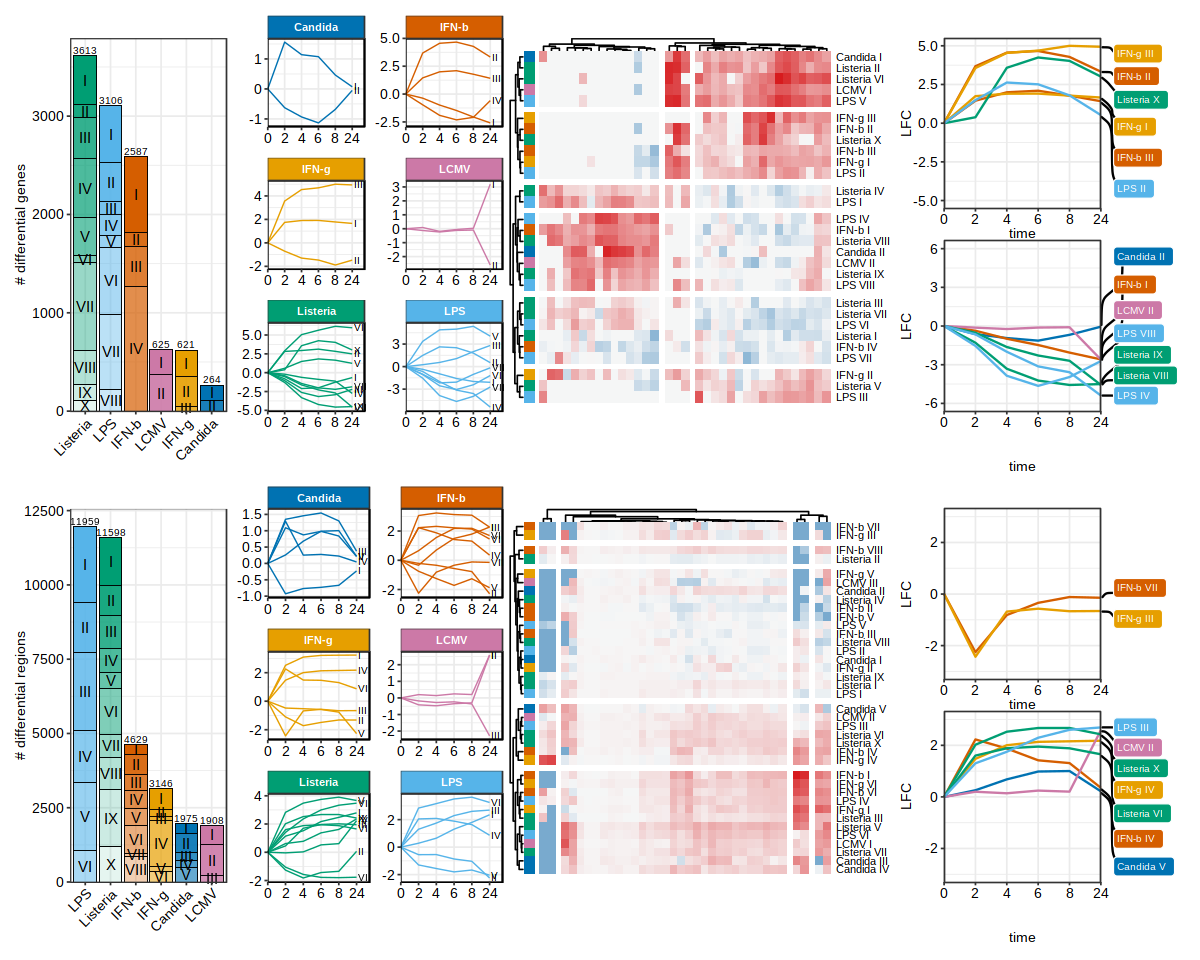

In [412]:
# SIZE
# A4 8.27 x 11.69 inches -> 8.25 x 11.5
width <- 10 # width 19cm -> 7.4 -> 8in
height <- 8 # height 15cm -> 6in 
options(repr.plot.width=width, repr.plot.height=height)


# LAYOUT
layout <- "
AACCCEEEEEGG
AACCCEEEEEHH
BBDDDFFFFFII
BBDDDFFFFFJJ
"

# layout <- "
# ACCEEEEEG
# ACCEEEEEH
# BDDFFFFFI
# BDDFFFFFJ
# "

# one letter is 1in

# PLOT
fig2 <- clust_rna_p + #A
clust_atac_p + #B
RNA_ts_p_all +  #C
ATAC_ts_p_all +  #D
enr_rna_clustermap  +  #E
enr_atac_clustermap  + #F
special_centers_rna_p[1]  +  #G
special_centers_rna_p[2]  + #H
special_centers_atac_p[1] + #I
special_centers_atac_p[2] + #J
plot_layout(design = layout)  #, guides = 'auto')
#      plot_annotation(tag_levels = 'a') & theme(plot.tag = element_text(size = 8))

fig2

In [413]:
# save plot
ggsave_new(filename="Fig2",
           results_path=results_path,
           plot=fig2,
           width=width,
           height=height
          )